In [ ]:
%matplotlib inline


# Plotting Wind Direction Using Quiver

This example demonstrates using quiver to plot wind speed contours and wind
direction arrows from wind vector component input data. The vector components
are co-located in space in this case.

For the second plot, the data used for the arrows is normalised to produce
arrows with a uniform size on the plot.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

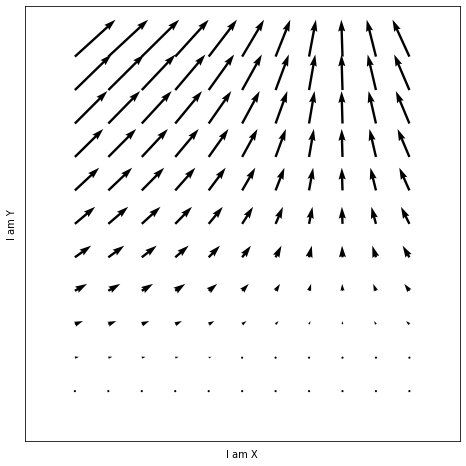

In [10]:
 # Creating arrow
x = np.arange(0, 2.2, 0.2)
y = np.arange(0, 2.2, 0.2)
 
X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(Y)*Y
 
# creating plot
fig, ax = plt.subplots(figsize =(14, 8))
ax.quiver(X, Y, u, v)
 
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.3, 2.3, -0.3, 2.3])
ax.set_aspect('equal')
ax.set_xlabel('I am X')
ax.set_ylabel('I am Y')
# show plot
plt.show()

In [4]:
from netCDF4 import Dataset
import xarray as xr
import rioxarray as rx

In [5]:
cd F:\Osmanabad

F:\Osmanabad


In [6]:
ls

 Volume in drive F is New Volume
 Volume Serial Number is 0A5E-82EC

 Directory of F:\Osmanabad

07/01/2022  03:15 PM    <DIR>          .
07/01/2022  03:15 PM    <DIR>          ..
06/03/2022  11:16 AM    <DIR>          Data
05/24/2022  12:25 PM       401,893,563 MERRA2_400.tavg1_2d_flx_Nx.20200101.nc4
05/27/2022  11:52 AM    <DIR>          Osmanabad Elivation USGS Data
07/01/2022  03:16 PM    <DIR>          Osmanabad topography
06/17/2022  04:45 PM    <DIR>          Osmanabad_Shapefile
               1 File(s)    401,893,563 bytes
               6 Dir(s)  143,245,647,872 bytes free


In [7]:
data = xr.load_dataset('MERRA2_400.tavg1_2d_flx_Nx.20200101.nc4')

In [8]:
data

<xarray.Dataset>
Dimensions:      (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time         (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01T23:...
Data variables: (12/46)
    BSTAR        (time, lat, lon) float32 -0.001504 -0.001504 ... -0.0005912
    CDH          (time, lat, lon) float32 0.001425 0.001425 ... 0.009985
    CDM          (time, lat, lon) float32 0.001508 0.001508 ... 0.01246 0.01246
    CDQ          (time, lat, lon) float32 0.001425 0.001425 ... 0.009985
    CN           (time, lat, lon) float32 0.001345 0.001345 ... 0.00135 0.00135
    DISPH        (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...           ...
    TSTAR        (time, lat, lon) float32 -0.03821 -0.03821 ... -0.01976
    ULML         (time, lat, lon) float32 4.21 4.205 4.199 ... 2.152 2.235 2.318
    USTAR        (time, lat, lon) float32 0.08671 0.08671 ... 0.2517 0.2517
    VLML         (time, lat, lon) float32 1.273 1.33 1.387 ... 5.75 5.73 5.711
    Z0H          (time, lat, lon) float32 0.001 0.001 0.001 ... 0.001 0.001
    Z0M          (time, lat, lon) float32 0.005 0.005 0.005 ... 0.001 0.001
Attributes: (12/30)
    History:                           Original file generated: Mon Jan 13 21...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_flx_Nx.20200101.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/7MCPBJ41Y0K6
    RangeBeginningDate:                2020-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2020-01-01
    RangeEndingTime:                   23:59:59.000000

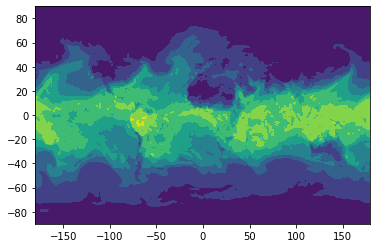

In [13]:
plt.contourf(data.lon,data.lat,data.QLML[0,:,:])

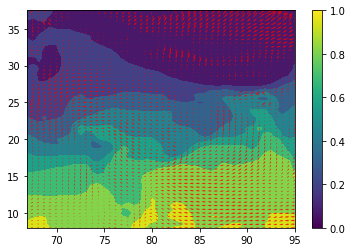

In [62]:
plt.contourf(data.lon[395:441],data.lat[196:256],data.QLML[0,196:256,395:441])
plt.quiver(data.lon[395:441],data.lat[196:256],data.ULML[0,196:256,395:441],data.VLML[0,196:256,395:441],color='red', 
           headlength=7)
plt.colorbar()
plt.savefig('Wind.jpg',dpi=1080)